In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

# Data Structure

In [2]:
data_dir = 'data'

if os.path.isdir(data_dir):
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print('Please checkout to include-data branch.')

data/big-five-personality-test/6.csv
data/big-five-personality-test/5.csv
data/big-five-personality-test/4.csv
data/big-five-personality-test/1.csv
data/big-five-personality-test/3.csv
data/big-five-personality-test/2.csv


# Handle Big Five Personality Data

In [3]:
data_final_dir = 'data/big-five-personality-test'

csv_reading = list()
is_reduce = True

if os.path.isdir(data_final_dir):
    for dirname, _, filenames in os.walk(data_final_dir):
        for filename in filenames:
            if(not is_reduce or filename == '6.csv'):
                csv_reading.append(pd.read_csv(os.path.join(dirname, filename), sep='\t'))
                print(f'Reading: {os.path.join(dirname, filename)}, Total: {len(csv_reading[-1])}')
else:
    print('Please checkout to include-data branch.')

data = pd.concat(csv_reading)  

print(f'Total: {len(data)}')
data.head()

Reading: data/big-five-personality-test/6.csv, Total: 15342
Total: 15342


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,2,1,1,4,3,1,4,5,1,5,...,2018-11-01 10:13:54,414,736,8,253,10,1,US,38.0,-97.0
1,3,3,4,3,3,4,1,2,2,5,...,2018-11-01 10:13:56,414,896,3,229,2,53,US,32.7776,-83.6802
2,3,2,3,3,4,2,2,4,3,3,...,2018-11-01 10:14:00,375,812,7,233,8,1,US,38.0,-97.0
3,3,3,3,2,3,3,3,4,1,3,...,2018-11-01 10:14:03,375,667,3,249,15,53,US,32.7776,-83.6802
4,2,2,3,3,3,2,2,4,3,4,...,2018-11-01 10:14:04,414,736,4,247,14,1,US,38.0,-97.0


# Reverse value

In [4]:
positively_keyed = ['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9',
                    'EST1', 'EST3', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
                    'AGR2', 'AGR4', 'AGR6', 'AGR8', 'AGR9', 'AGR10',
                    'CSN1', 'CSN3', 'CSN5', 'CSN7', 'CSN9', 'CSN10', 
                    'OPN1', 'OPN3', 'OPN5', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

negatively_keyed = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
                    'EST2', 'EST4',
                    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                    'OPN2', 'OPN4', 'OPN6']

In [5]:
data.loc[:, negatively_keyed] = 6 - data.loc[:, negatively_keyed]

# Factor aggregation

In [6]:
EXT = ['EXT' + str(i) for i in range(1,11)]
EST = ['EST' + str(i) for i in range(1,11)]
AGR = ['AGR' + str(i) for i in range(1,11)]
CSN = ['CSN' + str(i) for i in range(1,11)]
OPN = ['OPN' + str(i) for i in range(1,11)]

In [7]:
data['OPN'] = data.loc[:, OPN].mean(axis=1)

In [8]:
filter_columns = [] + EXT + EST + AGR + CSN + ['OPN', ]
data = data.loc[:, filter_columns]

In [9]:
print(f'Total: {len(data)}')
data.head()

Total: 15342


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN
0,2,5,1,2,3,5,4,1,1,1,...,5,5,5,3,5,4,4,4,4,3.3
1,3,3,4,3,3,2,1,4,2,1,...,5,5,4,4,5,5,2,5,5,3.7
2,3,4,3,3,4,4,2,2,3,3,...,2,4,2,3,2,4,2,4,3,3.8
3,3,3,3,4,3,3,3,2,1,3,...,5,5,5,3,5,3,5,3,4,3.6
4,2,4,3,3,3,4,2,2,3,2,...,3,5,4,2,4,4,4,4,4,3.9


In [10]:
data.dtypes

EXT1       int64
EXT2       int64
EXT3       int64
EXT4       int64
EXT5       int64
EXT6       int64
EXT7       int64
EXT8       int64
EXT9       int64
EXT10      int64
EST1       int64
EST2       int64
EST3       int64
EST4       int64
EST5       int64
EST6       int64
EST7       int64
EST8       int64
EST9       int64
EST10      int64
AGR1       int64
AGR2       int64
AGR3       int64
AGR4       int64
AGR5       int64
AGR6       int64
AGR7       int64
AGR8       int64
AGR9       int64
AGR10      int64
CSN1       int64
CSN2       int64
CSN3       int64
CSN4       int64
CSN5       int64
CSN6       int64
CSN7       int64
CSN8       int64
CSN9       int64
CSN10      int64
OPN      float64
dtype: object

# Random Data

In [11]:
data_num = data.shape[0]
indexes = np.random.permutation(data_num)

In [12]:
proportion = [0.98, 0.01, 0.01] if data_num > 1000000 else [0.6, 0.2, 0.2]

train_indexes = indexes[:int(data_num *proportion[0])]
val_indexes = indexes[int(data_num * proportion[0]):int(data_num * (proportion[0] + proportion[1]))]
test_indexes = indexes[int(data_num * (proportion[0] + proportion[1])):]

train_data = data.loc[train_indexes] if is_reduce else data[:int(data_num *proportion[0])]
val_data = data.loc[val_indexes] if is_reduce else data[int(data_num * proportion[0]):int(data_num * (proportion[0] + proportion[1]))]
test_data = data.loc[test_indexes] if is_reduce else data[int(data_num * (proportion[0] + proportion[1])):]

print(f'''train_data: {len(train_data)}
val_data: {len(val_data)}
test_data: {len(test_data)}''')

train_data: 9205
val_data: 3068
test_data: 3069


# Normalization

In [13]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()

In [14]:
train_data = (train_data - mean) / std
val_data = (val_data - mean) / std

# Establish training data in Numpy array format

In [15]:
x_train = np.array(train_data.drop('OPN', axis='columns'))
y_train = np.array(train_data['OPN'])
x_val = np.array(val_data.drop('OPN', axis='columns'))
y_val = np.array(val_data['OPN'])

In [16]:
model_dir = os.path.join('logs', 'models')

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Create Model

## Initialising the ANN

In [17]:
model = keras.Sequential(name='model')

## Adding the input layer and the first hidden layer

In [18]:
model.add(layers.Dense(64, kernel_initializer='uniform', activation='relu', input_shape=((len(filter_columns) - 1),)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

## Compiling the ANN

In [19]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

## Set callback function

In [20]:
log_dir = os.path.join('logs', 'model')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(os.path.join(model_dir, 'Best-model.h5'), 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')

In [21]:
history = model.fit(x_train, y_train,
               batch_size=150,
               epochs=100,
               validation_data=(x_val, y_val),
               callbacks=[model_cbk, model_mckp])

Train on 9205 samples, validate on 3068 samples
Epoch 1/100
9205/9205 [==============================] - 1s 89us/sample - loss: 0.8698 - mean_absolute_error: 0.7478 - val_loss: 0.7347 - val_mean_absolute_error: 0.6882
Epoch 2/100
9205/9205 [==============================] - 0s 14us/sample - loss: 0.7564 - mean_absolute_error: 0.6913 - val_loss: 0.7250 - val_mean_absolute_error: 0.6832
Epoch 3/100
9205/9205 [==============================] - 0s 14us/sample - loss: 0.7388 - mean_absolute_error: 0.6816 - val_loss: 0.7149 - val_mean_absolute_error: 0.6808
Epoch 4/100
9205/9205 [==============================] - 0s 13us/sample - loss: 0.7288 - mean_absolute_error: 0.6787 - val_loss: 0.7121 - val_mean_absolute_error: 0.6778
Epoch 5/100
9205/9205 [==============================] - 0s 14us/sample - loss: 0.7244 - mean_absolute_error: 0.6752 - val_loss: 0.7061 - val_mean_absolute_error: 0.6706
Epoch 6/100
9205/9205 [==============================] - 0s 13us/sample - loss: 0.7167 - mean_absolute

Epoch 49/100
9205/9205 [==============================] - 0s 12us/sample - loss: 0.6164 - mean_absolute_error: 0.6221 - val_loss: 0.7189 - val_mean_absolute_error: 0.6734
Epoch 50/100
9205/9205 [==============================] - 0s 13us/sample - loss: 0.6171 - mean_absolute_error: 0.6218 - val_loss: 0.7161 - val_mean_absolute_error: 0.6723
Epoch 51/100
9205/9205 [==============================] - 0s 12us/sample - loss: 0.6164 - mean_absolute_error: 0.6230 - val_loss: 0.7158 - val_mean_absolute_error: 0.6721
Epoch 52/100
9205/9205 [==============================] - 0s 12us/sample - loss: 0.6146 - mean_absolute_error: 0.6215 - val_loss: 0.7152 - val_mean_absolute_error: 0.6726
Epoch 53/100
9205/9205 [==============================] - 0s 13us/sample - loss: 0.6124 - mean_absolute_error: 0.6200 - val_loss: 0.7157 - val_mean_absolute_error: 0.6710
Epoch 54/100
9205/9205 [==============================] - 0s 12us/sample - loss: 0.6033 - mean_absolute_error: 0.6166 - val_loss: 0.7175 - val_me

Epoch 97/100
9205/9205 [==============================] - 0s 12us/sample - loss: 0.5775 - mean_absolute_error: 0.6030 - val_loss: 0.7307 - val_mean_absolute_error: 0.6777
Epoch 98/100
9205/9205 [==============================] - 0s 12us/sample - loss: 0.5738 - mean_absolute_error: 0.5989 - val_loss: 0.7274 - val_mean_absolute_error: 0.6775
Epoch 99/100
9205/9205 [==============================] - 0s 11us/sample - loss: 0.5750 - mean_absolute_error: 0.6035 - val_loss: 0.7296 - val_mean_absolute_error: 0.6777
Epoch 100/100
9205/9205 [==============================] - 0s 12us/sample - loss: 0.5721 - mean_absolute_error: 0.6007 - val_loss: 0.7270 - val_mean_absolute_error: 0.6761


# Verify the effectiveness

In [22]:
model = keras.models.load_model(os.path.join(model_dir, 'Best-model.h5'))

y_test = np.array(test_data['OPN'])
test_data = (test_data - mean) / std

x_test = np.array(test_data.drop('OPN', axis='columns'))
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['OPN'] + mean['OPN'], y_test.shape)
model_percentage_error = np.nanmean(np.abs(y_test - y_pred)) / np.nanmean(y_test) * 100

# Results of training

## Percentage Error

In [23]:
print("Model: {:.2f}%".format(model_percentage_error))

Model: 11.47%


## acc - loss curve diagram

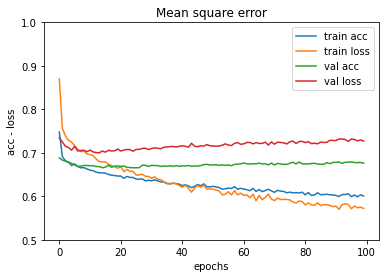

In [24]:
plt.plot(history.history['mean_absolute_error'], label='train acc')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_mean_absolute_error'], label='val acc')
plt.plot(history.history['val_loss'], label='val loss')
plt.ylim(0.5, 1)
plt.title('Mean square error')
plt.ylabel('acc - loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')